In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
titanic_data = pd.read_csv('titanic.csv')

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

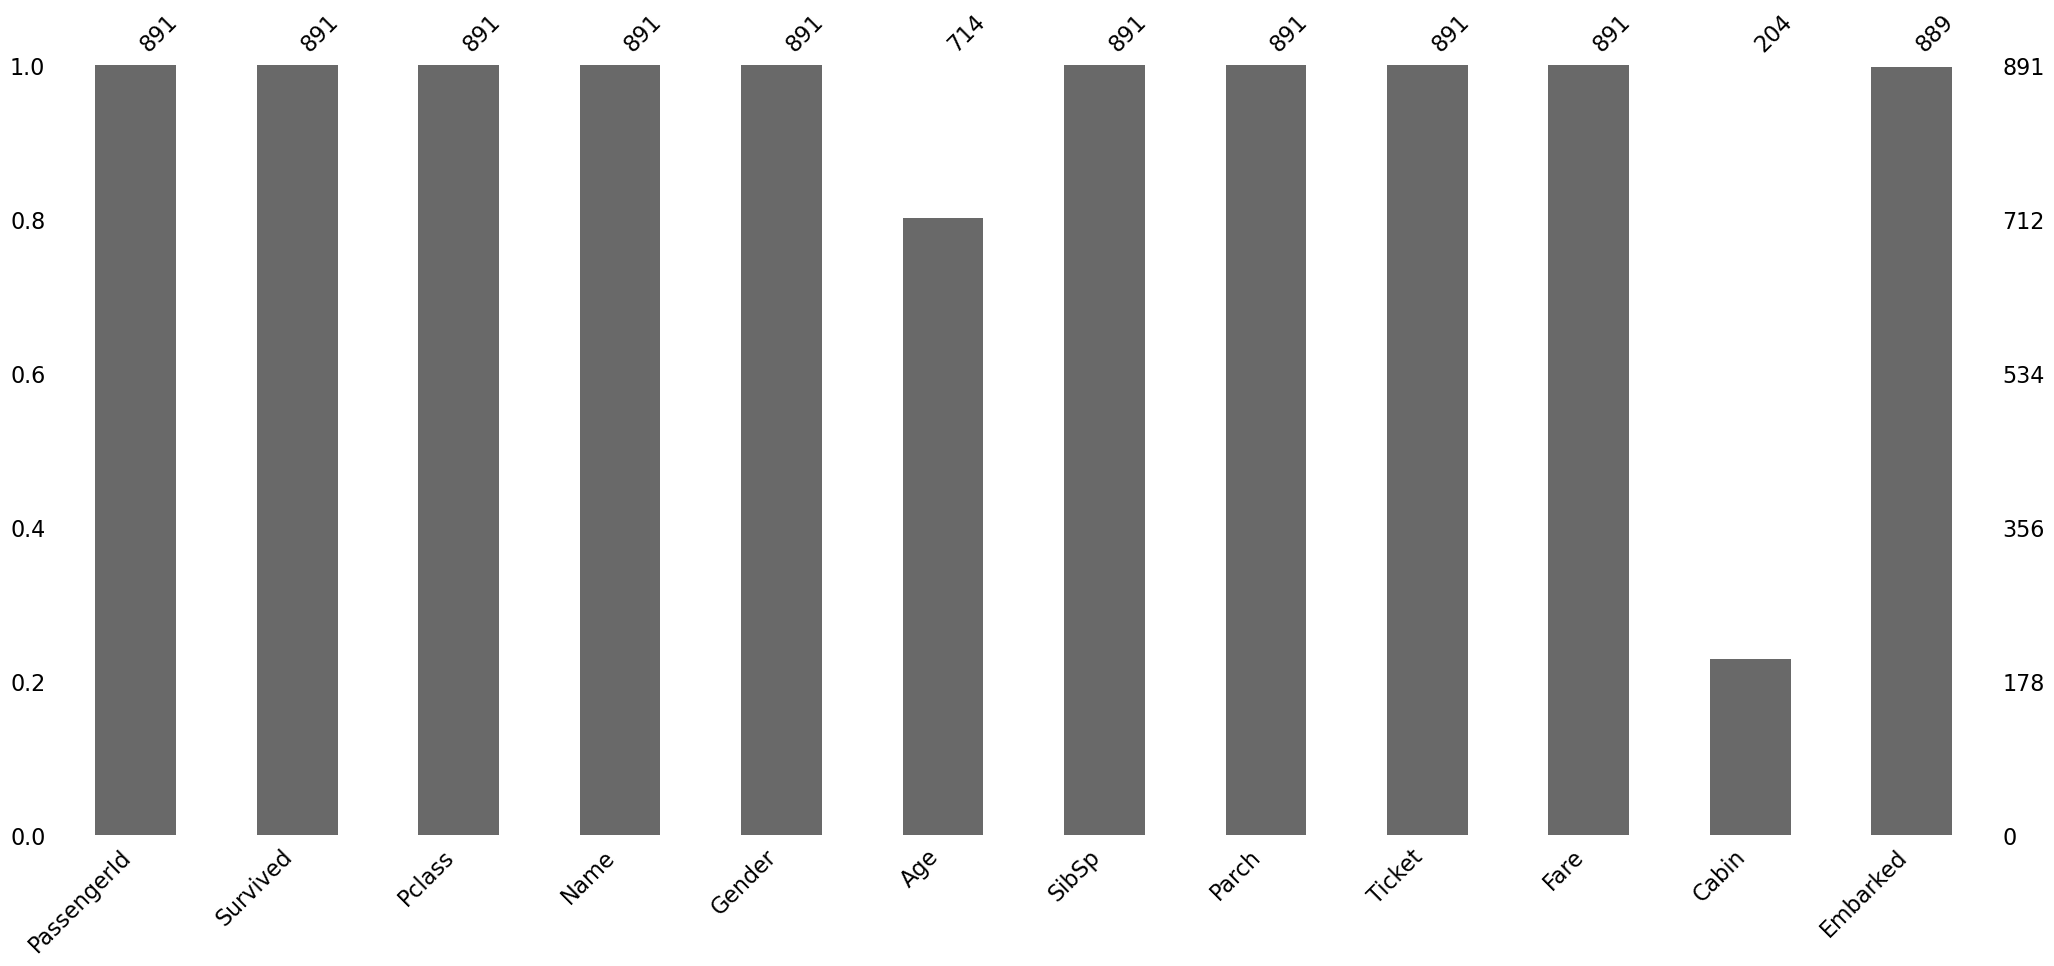

In [6]:
msno.bar(titanic_data)

<Axes: >

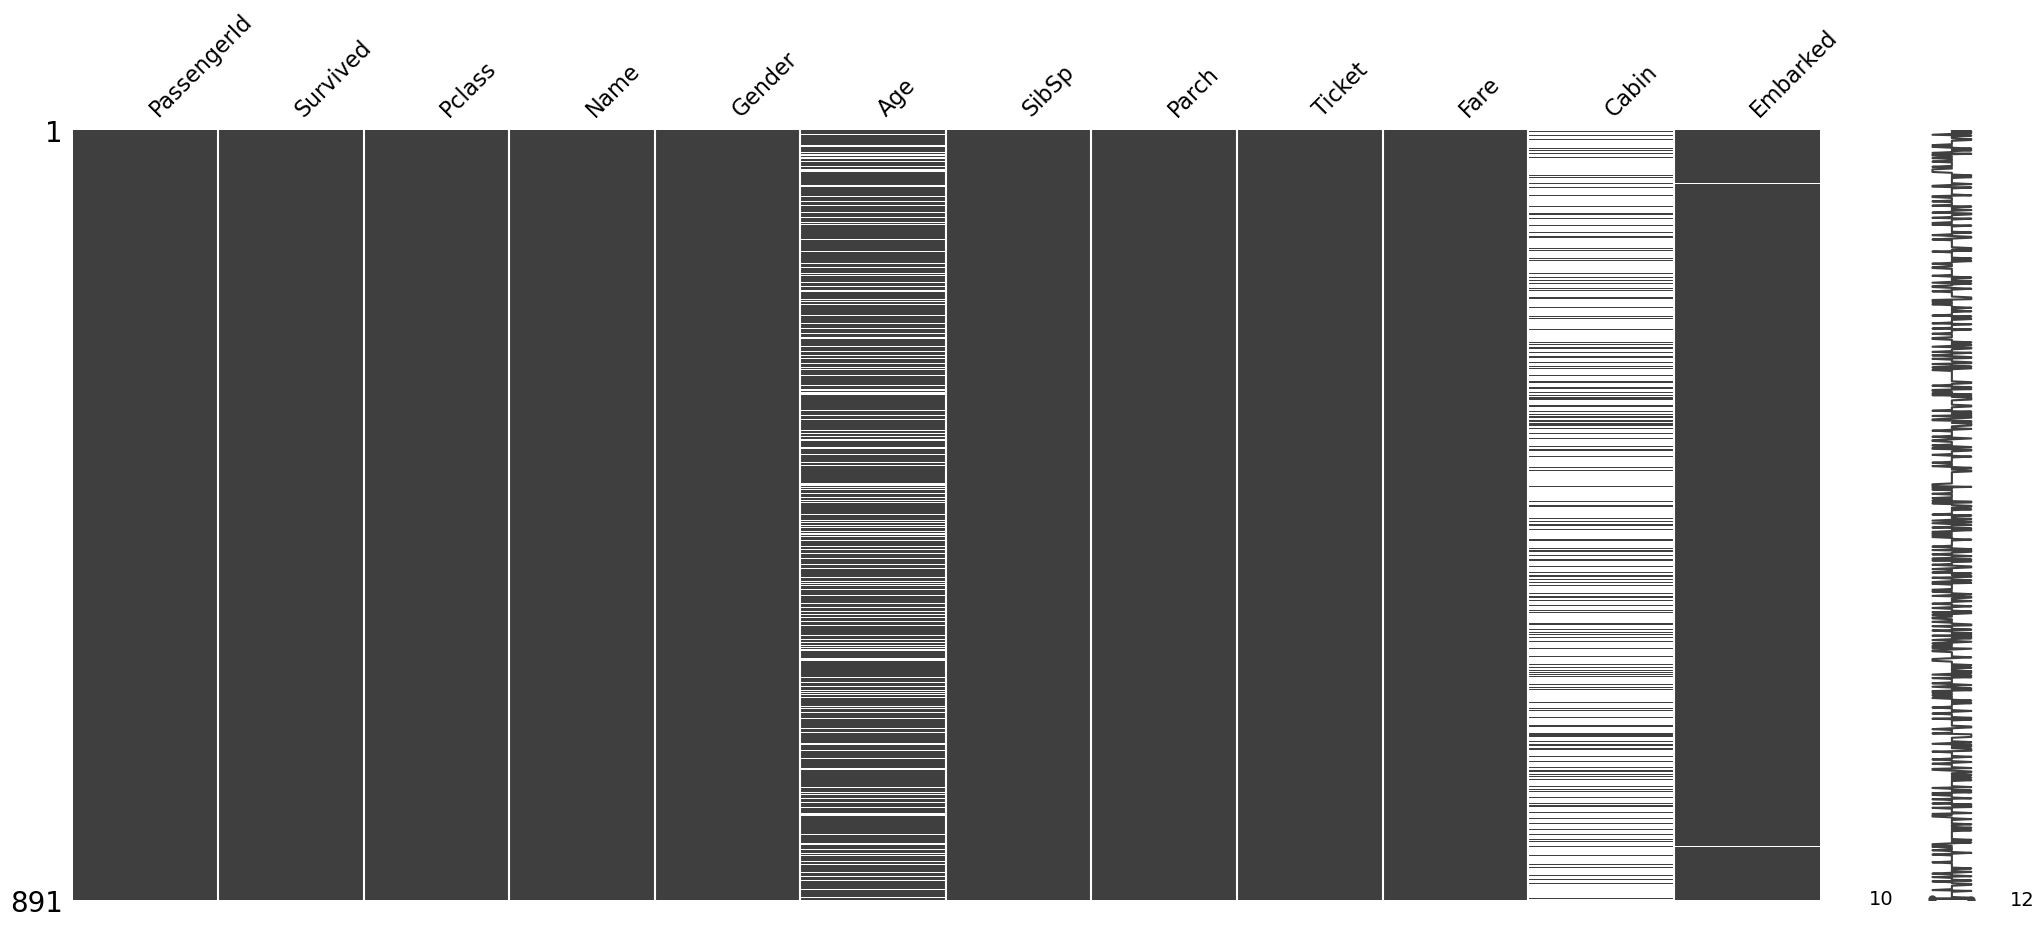

In [7]:
msno.matrix(titanic_data)

In [8]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

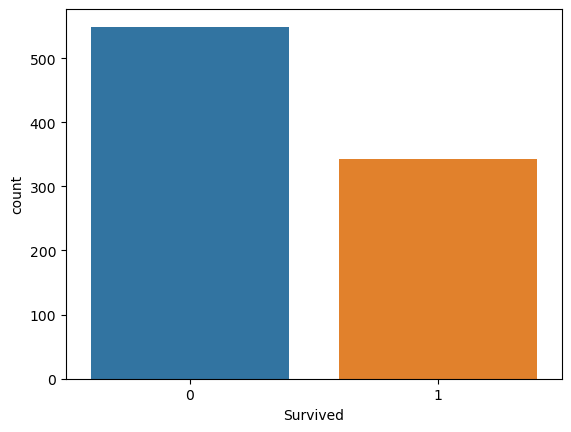

In [9]:
sns.countplot(data=titanic_data,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

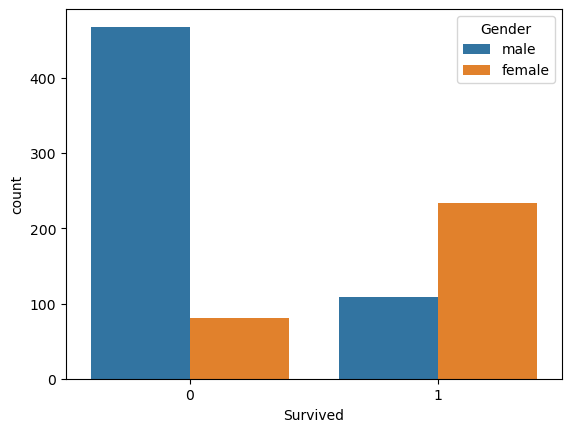

In [10]:
sns.countplot(data=titanic_data,x='Survived',hue='Gender')

In [11]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
titanic_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

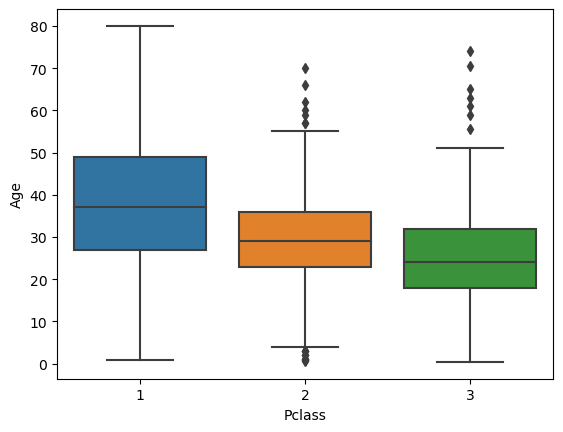

In [13]:
sns.boxplot(data=titanic_data,x='Pclass',y="Age")

In [14]:
def add_10(num):
    print(num)

In [15]:
add_10(22)

22


In [16]:
def fill_age(row):
    pclass = row[0]
    age = row[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        elif pclass==3:
            return 21
    else:
        return age
    

In [17]:
titanic_data[['Pclass','Age']].apply(add_10,axis=1)

Pclass     3.0
Age       22.0
Name: 0, dtype: float64
Pclass     1.0
Age       38.0
Name: 1, dtype: float64
Pclass     3.0
Age       26.0
Name: 2, dtype: float64
Pclass     1.0
Age       35.0
Name: 3, dtype: float64
Pclass     3.0
Age       35.0
Name: 4, dtype: float64
Pclass    3.0
Age       NaN
Name: 5, dtype: float64
Pclass     1.0
Age       54.0
Name: 6, dtype: float64
Pclass    3.0
Age       2.0
Name: 7, dtype: float64
Pclass     3.0
Age       27.0
Name: 8, dtype: float64
Pclass     2.0
Age       14.0
Name: 9, dtype: float64
Pclass    3.0
Age       4.0
Name: 10, dtype: float64
Pclass     1.0
Age       58.0
Name: 11, dtype: float64
Pclass     3.0
Age       20.0
Name: 12, dtype: float64
Pclass     3.0
Age       39.0
Name: 13, dtype: float64
Pclass     3.0
Age       14.0
Name: 14, dtype: float64
Pclass     2.0
Age       55.0
Name: 15, dtype: float64
Pclass    3.0
Age       2.0
Name: 16, dtype: float64
Pclass    2.0
Age       NaN
Name: 17, dtype: float64
Pclass     3.0
Age       31.0


0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Length: 891, dtype: object

In [18]:
titanic_data['Age']=titanic_data[['Pclass','Age']].apply(fill_age,axis=1)

In [19]:
titanic_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [20]:
from sklearn.preprocessing import LabelEncoder
label_enco = LabelEncoder()

In [21]:
label_enco.fit(titanic_data['Gender'])

LabelEncoder()

In [22]:
label_enco.transform(titanic_data['Gender'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [23]:
titanic_data['Gender'] = label_enco.transform(titanic_data['Gender'])

In [24]:
titanic_data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [25]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [27]:
titanic_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [28]:
titanic_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [29]:
titanic_data.dropna(inplace=True)

In [30]:
titanic_data.reset_index(drop=True,inplace=True)

In [31]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

In [32]:
one_hot.fit(titanic_data[['Embarked']])

OneHotEncoder()

In [33]:
temp_arr = one_hot.transform(titanic_data[['Embarked']]).toarray()

In [34]:
temp_arr

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [35]:
temp_data = pd.DataFrame(temp_arr,columns=['C','Q','S'],dtype='int')

In [36]:
temp_data

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [37]:
titanic_data = pd.concat([titanic_data,temp_data],axis=1)

In [38]:
titanic_data.drop('Embarked',axis=1,inplace=True)

In [39]:
titanic_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [40]:
X = titanic_data.drop('Survived',axis=1)
Y = titanic_data['Survived']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [43]:
logistic.fit(X_train,Y_train)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
predictions = logistic.predict(X_test)

In [45]:
Y_test[9]

1

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(predictions,Y_test))

[[98 24]
 [ 9 47]]


In [47]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       122
           1       0.66      0.84      0.74        56

    accuracy                           0.81       178
   macro avg       0.79      0.82      0.80       178
weighted avg       0.84      0.81      0.82       178



<Axes: >

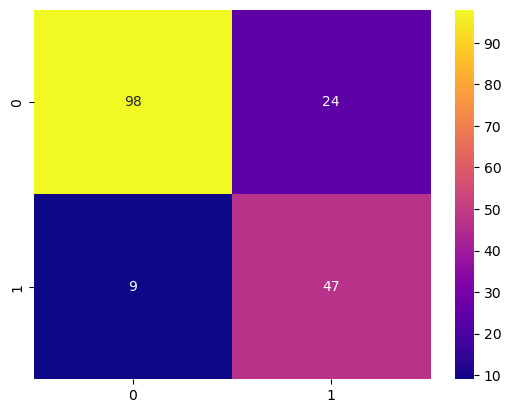

In [52]:
sns.heatmap(confusion_matrix(predictions,Y_test),cmap='plasma',annot=True)

In [49]:
from sklearn.metrics import accuracy_score,classification_report

In [55]:
accuracy = accuracy_score(Y_test,predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test, predictions))

Accuracy: 0.8146067415730337
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

